In [1]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from regions import CircleSkyRegion
import matplotlib.pyplot as plt
from utils3d import longitudeaxistrue, latitudeaxistrue, log10eaxistrue

# %matplotlib inline
from IPython.display import display
from gammapy.datasets import Datasets, MapDataset
from gammapy.modeling.models import (
    FoVBackgroundModel,
    Models,
    PowerLawNormSpectralModel,
    SkyModel,
    TemplateSpatialModel,
    create_fermi_isotropic_diffuse_model,
)


# %matplotlib inline
import numpy as np
from gammapy.maps import Map, MapAxis, MapAxes, WcsGeom
from scipy import interpolate
from scipy.integrate import simps
from scipy import special
from matplotlib.colors import LogNorm


/Users/lpin0002/anaconda3/envs/please/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def powerlaw(energy, index, phi0=1):
    return phi0*energy**(index)

In [3]:
print(longitudeaxistrue, latitudeaxistrue, log10eaxistrue)

[-3.5        -3.29411765 -3.08823529 -2.88235294 -2.67647059 -2.47058824
 -2.26470588 -2.05882353 -1.85294118 -1.64705882 -1.44117647 -1.23529412
 -1.02941176 -0.82352941 -0.61764706 -0.41176471 -0.20588235  0.
  0.20588235  0.41176471  0.61764706  0.82352941  1.02941176  1.23529412
  1.44117647  1.64705882  1.85294118  2.05882353  2.26470588  2.47058824
  2.67647059  2.88235294  3.08823529  3.29411765  3.5       ] [-3.         -2.79310345 -2.5862069  -2.37931034 -2.17241379 -1.96551724
 -1.75862069 -1.55172414 -1.34482759 -1.13793103 -0.93103448 -0.72413793
 -0.51724138 -0.31034483 -0.10344828  0.10344828  0.31034483  0.51724138
  0.72413793  0.93103448  1.13793103  1.34482759  1.55172414  1.75862069
  1.96551724  2.17241379  2.37931034  2.5862069   2.79310345  3.        ] [-8.00000000e-01 -7.90000000e-01 -7.80000000e-01 -7.70000000e-01
 -7.60000000e-01 -7.50000000e-01 -7.40000000e-01 -7.30000000e-01
 -7.20000000e-01 -7.10000000e-01 -7.00000000e-01 -6.90000000e-01
 -6.80000000e-01 -6.

# HESS GPS Sources

In [4]:
from gammapy.catalog import SourceCatalogHGPS


hess_catalog = SourceCatalogHGPS("hgps_catalog_v1.fits.gz")

hess_models = hess_catalog.to_models()

print(f"\nThere are {len(hess_models)} sources within the HGPS.")

/Users/lpin0002/anaconda3/envs/please/lib/python3.9/site-packages/gammapy/modeling/models/spatial.py:554: RuntimeWarning: invalid value encountered in multiply
  return u.Quantity(norm * np.exp(exponent).value, "sr-1", copy=False)



There are 96 sources within the HGPS.


In [5]:


trueenergyaxis = 10**log10eaxistrue*u.TeV

energy_axis_true = MapAxis.from_nodes(trueenergyaxis, interp='log', name="energy_true")

goodgeom = WcsGeom.create(
    skydir=SkyCoord(0, 0, unit="deg", frame='galactic'),
    binsz=longitudeaxistrue[1]-longitudeaxistrue[0],
    width=(longitudeaxistrue[-1]-longitudeaxistrue[0]+longitudeaxistrue[1]-longitudeaxistrue[0], latitudeaxistrue[-1]-latitudeaxistrue[0]+longitudeaxistrue[1]-longitudeaxistrue[0]),
    frame="galactic",
    proj="CAR",
    axes=[energy_axis_true],
)

goodmap = Map.from_geom(goodgeom)
goodmap

WcsNDMap

	geom  : WcsGeom 
 	axes  : ['lon', 'lat', 'energy_true']
	shape : (35, 30, 231)
	ndim  : 3
	unit  : 
	dtype : float32

In [6]:
hessenergyaxis = energy_axis_true.center.value
np.log10(hessenergyaxis[1:]-hessenergyaxis[:-1])

array([-2.43277472, -2.42277472, -2.41277472, -2.40277472, -2.39277472,
       -2.38277472, -2.37277472, -2.36277472, -2.35277472, -2.34277472,
       -2.33277472, -2.32277472, -2.31277472, -2.30277472, -2.29277472,
       -2.28277472, -2.27277472, -2.26277472, -2.25277472, -2.24277472,
       -2.23277472, -2.22277472, -2.21277472, -2.20277472, -2.19277472,
       -2.18277472, -2.17277472, -2.16277472, -2.15277472, -2.14277472,
       -2.13277472, -2.12277472, -2.11277472, -2.10277472, -2.09277472,
       -2.08277472, -2.07277472, -2.06277472, -2.05277472, -2.04277472,
       -2.03277472, -2.02277472, -2.01277472, -2.00277472, -1.99277472,
       -1.98277472, -1.97277472, -1.96277472, -1.95277472, -1.94277472,
       -1.93277472, -1.92277472, -1.91277472, -1.90277472, -1.89277472,
       -1.88277472, -1.87277472, -1.86277472, -1.85277472, -1.84277472,
       -1.83277472, -1.82277472, -1.81277472, -1.80277472, -1.79277472,
       -1.78277472, -1.77277472, -1.76277472, -1.75277472, -1.74

In [7]:

# fig, ax = plt.subplots(2,4, figsize=(8,3))


# m = Map.create(skydir=(0, 0), width=(10, 10), binsz=0.1, frame="galactic")
m= goodmap
count=0
fullhessdataset = 0
for idx, model in enumerate(hess_models):
    templvalue = model.spatial_model.position.l.value
    tempbvalue = model.spatial_model.position.b.value
    
    if templvalue>180:
        templvalue=templvalue-360
    
    if np.abs(templvalue)<5 and np.abs(tempbvalue)<5:
        print(templvalue, tempbvalue, idx)
        try:
            m.quantity = model.evaluate_geom(m.geom)
            # m.plot(ax=ax[count//4, count%4], add_cbar=True)
            startdata = m.data
            data = startdata[~np.isnan(startdata)]
            if data.size!=0:
                data = data.reshape(startdata.shape)
                fullhessdataset+=data
            
        except:
            print("Something weird happened")
            print(idx, '\n\n')
        count+=1
# plt.show()
fullhessdataset = np.transpose(fullhessdataset, axes=(0,2,1))

-1.723175048828125 0.04908088967204094 46
-0.05511474609375 -0.043911051005125046 47
-1.35516357421875 -0.5642170310020447 48
0.14000000059604645 -0.11400000005960464 49
-1.551788330078125 -1.1144022941589355 50
3.779721736907959 1.714707851409912 51
0.871999979019165 0.07599999755620956 52


In [8]:
150*500*500/250000

150.0

In [9]:
hessgeom = goodmap.geom
hesslonvals = hessgeom.get_coord().lon.value[0][0]
hesslonvals = hesslonvals[::-1]
hesslonvals[hesslonvals>180] = hesslonvals[hesslonvals>180]-360
# print("lon vals", hesslonvals)

hesslatvals = hessgeom.get_coord().lat.value[0][:,0]
# print("lat vals", hesslatvals)
print(hesslonvals.shape)
print(hesslatvals.shape)

(35,)
(30,)


In [10]:
m.quantity.unit

Unit("1 / (cm2 s sr TeV)")

In [11]:
fullhessdataset[0,0,0]

1.352971797224967e-205

(35,) (30,) (35, 30)


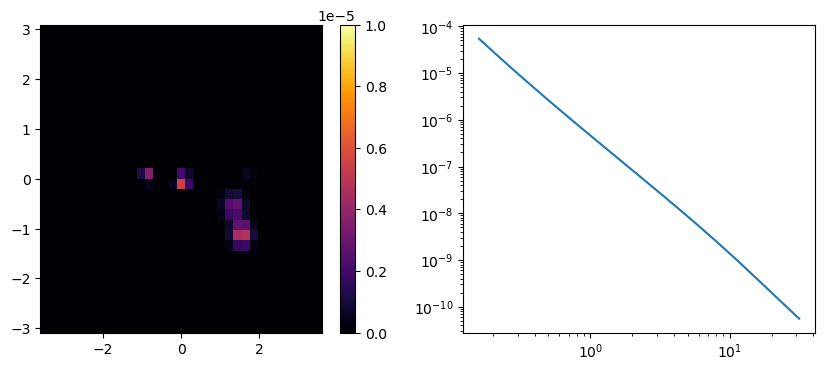

In [12]:
from scipy.ndimage import gaussian_filter

blurred_hess_data = fullhessdataset
print(hesslonvals.shape, hesslatvals.shape, blurred_hess_data[0].shape)
# Factor of 1e6 is so it matches with fermi backgrounds which are 1/MeV
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.pcolormesh(hesslonvals, 
               hesslatvals, 
               np.max(blurred_hess_data, axis=0).T, cmap='inferno', vmax=1e-5)
plt.colorbar()

plt.subplot(1,2,2)
plt.plot(hessenergyaxis,  np.sum(blurred_hess_data, axis=(1,2)))
plt.loglog()
plt.show()

# Fermi-LAT Diffuse Background Extraction

In [13]:
# template_diffuse = TemplateSpatialModel.read(
#     filename="gll_iem_v06_gc.fits.gz", normalize=False
# )

template_diffuse = TemplateSpatialModel.read(
    filename="gll_iem_v07.fits", normalize=False
)

print(template_diffuse.map)

diffuse_iem = SkyModel(
    spectral_model=PowerLawNormSpectralModel(),
    spatial_model=template_diffuse,
    name="diffuse-iem",
)

template_diffuse

WcsNDMap

	geom  : WcsGeom 
 	axes  : ['lon', 'lat', 'energy_true']
	shape : (2880, 1441, 28)
	ndim  : 3
	unit  : 1 / (cm2 MeV s sr)
	dtype : >f4



In [14]:
fermievaluated = np.flip(np.transpose(diffuse_iem.evaluate_geom(goodgeom), axes=(0,2,1)), axis=1)
fermiaveraged = special.logsumexp(np.log(fermievaluated.value.T)+10**log10eaxistrue+np.log(np.log(10))+log10eaxistrue[1]-log10eaxistrue[0], axis=2).T
fermiaveraged.shape

fermiaveraged = fermiaveraged-special.logsumexp(fermiaveraged+np.log(longitudeaxistrue[1]-longitudeaxistrue[0])+np.log(latitudeaxistrue[1]-latitudeaxistrue[0]))
fermifull = np.exp(fermiaveraged[np.newaxis, :, :]+np.log(powerlaw(10**log10eaxistrue, index=-2.41, phi0=1.36*1e-8))[:, np.newaxis, np.newaxis])
fermifull.shape

(231, 35, 30)

In [15]:
fermifull[1,0]

array([7.88507014e-09, 8.56950733e-09, 8.89322938e-09, 9.56676567e-09,
       1.02414013e-08, 1.11097077e-08, 1.20421282e-08, 1.29199541e-08,
       1.35654146e-08, 1.46344942e-08, 1.76811524e-08, 2.29777052e-08,
       2.79023432e-08, 4.23859885e-08, 5.32735906e-08, 6.09502234e-08,
       5.75263100e-08, 4.71629048e-08, 3.81798986e-08, 3.30323646e-08,
       3.37101276e-08, 2.91271626e-08, 2.04634798e-08, 1.50740960e-08,
       1.36123369e-08, 1.24120384e-08, 1.18144288e-08, 1.11537561e-08,
       9.87352853e-09, 9.33753228e-09])

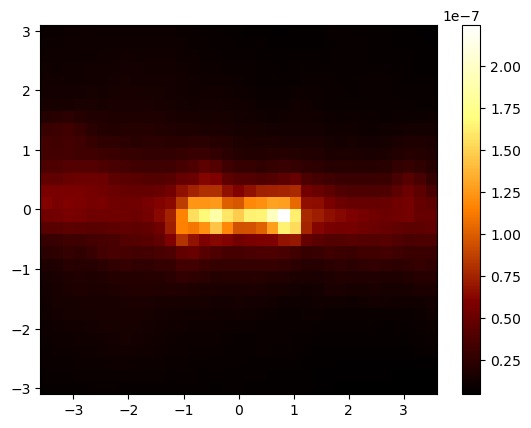

In [16]:
plt.figure()
plt.pcolormesh(longitudeaxistrue, latitudeaxistrue, fermifull[1].T, cmap='afmhot')
plt.colorbar()
plt.show()

In [17]:
fermievaluated = fermievaluated.to(1/u.TeV/u.s/u.sr/(u.cm**2))

In [18]:
fermievaluated[0,0,0]

<Quantity 1.48894384e-07 1 / (cm2 s sr TeV)>

In [19]:
fermilonaxistemp = np.unique(goodgeom.to_image().get_coord().lon.value)
firstover180idx = np.where(fermilonaxistemp>180)[0][0]
fermilonaxistemp[fermilonaxistemp>180] = fermilonaxistemp[fermilonaxistemp>180]-360
fermilonaxistemp.sort()
fermilonaxistemp.shape
fermilonaxis = fermilonaxistemp
fermilonaxis

array([-3.5       , -3.29411765, -3.08823529, -2.88235294, -2.67647059,
       -2.47058824, -2.26470588, -2.05882353, -1.85294118, -1.64705882,
       -1.44117647, -1.23529412, -1.02941176, -0.82352941, -0.61764706,
       -0.41176471, -0.20588235,  0.        ,  0.20588235,  0.41176471,
        0.61764706,  0.82352941,  1.02941176,  1.23529412,  1.44117647,
        1.64705882,  1.85294118,  2.05882353,  2.26470588,  2.47058824,
        2.67647059,  2.88235294,  3.08823529,  3.29411765,  3.5       ])

In [20]:
fermilataxis = goodgeom.get_coord().lat.value[0][:,0]
fermilataxis

array([-2.98529412, -2.77941176, -2.57352941, -2.36764706, -2.16176471,
       -1.95588235, -1.75      , -1.54411765, -1.33823529, -1.13235294,
       -0.92647059, -0.72058824, -0.51470588, -0.30882353, -0.10294118,
        0.10294118,  0.30882353,  0.51470588,  0.72058824,  0.92647059,
        1.13235294,  1.33823529,  1.54411765,  1.75      ,  1.95588235,
        2.16176471,  2.36764706,  2.57352941,  2.77941176,  2.98529412])

/Users/lpin0002/anaconda3/envs/please/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:653: RuntimeWarning: invalid value encountered in subtract
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


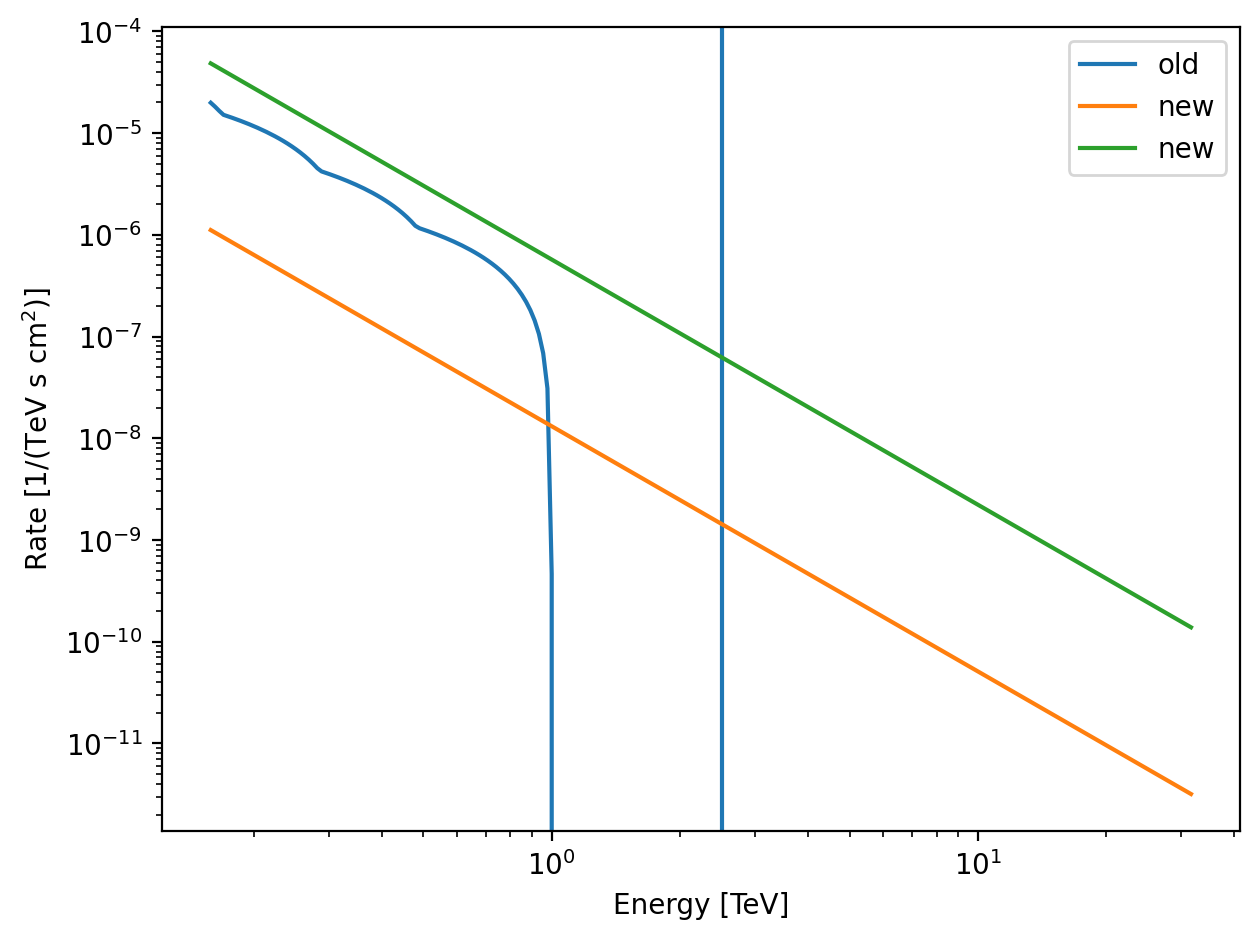

In [21]:

plt.figure(dpi=200)
cutoff = 120
vals = simps(y=simps(y=fermievaluated[:cutoff,:,:], x= longitudeaxistrue, axis=1), x = latitudeaxistrue, axis=1)
fit = interpolate.interp1d(y=np.log(vals), x=log10eaxistrue[:cutoff], bounds_error=False, fill_value='extrapolate')
# plt.plot(10**log10eaxistrue[:cutoff], vals)
plt.plot(10**log10eaxistrue, np.exp(fit(log10eaxistrue)), label='old')
plt.axvline(10**log10eaxistrue[cutoff])
plt.plot(10**log10eaxistrue, simps(y=simps(y=fermifull, x= longitudeaxistrue, axis=1), x = latitudeaxistrue, axis=1), label='new')
plt.plot(10**log10eaxistrue, powerlaw(10**log10eaxistrue, index=-2.41, phi0=1.36*1e-8)*(longitudeaxistrue[-1]-longitudeaxistrue[0])*(latitudeaxistrue[-1]-latitudeaxistrue[0]), label='new')
plt.loglog()
plt.xlabel('Energy [TeV]')
plt.ylabel(r'Rate [1/(TeV s cm$^2$)]')
plt.legend()
plt.tight_layout()
plt.show()

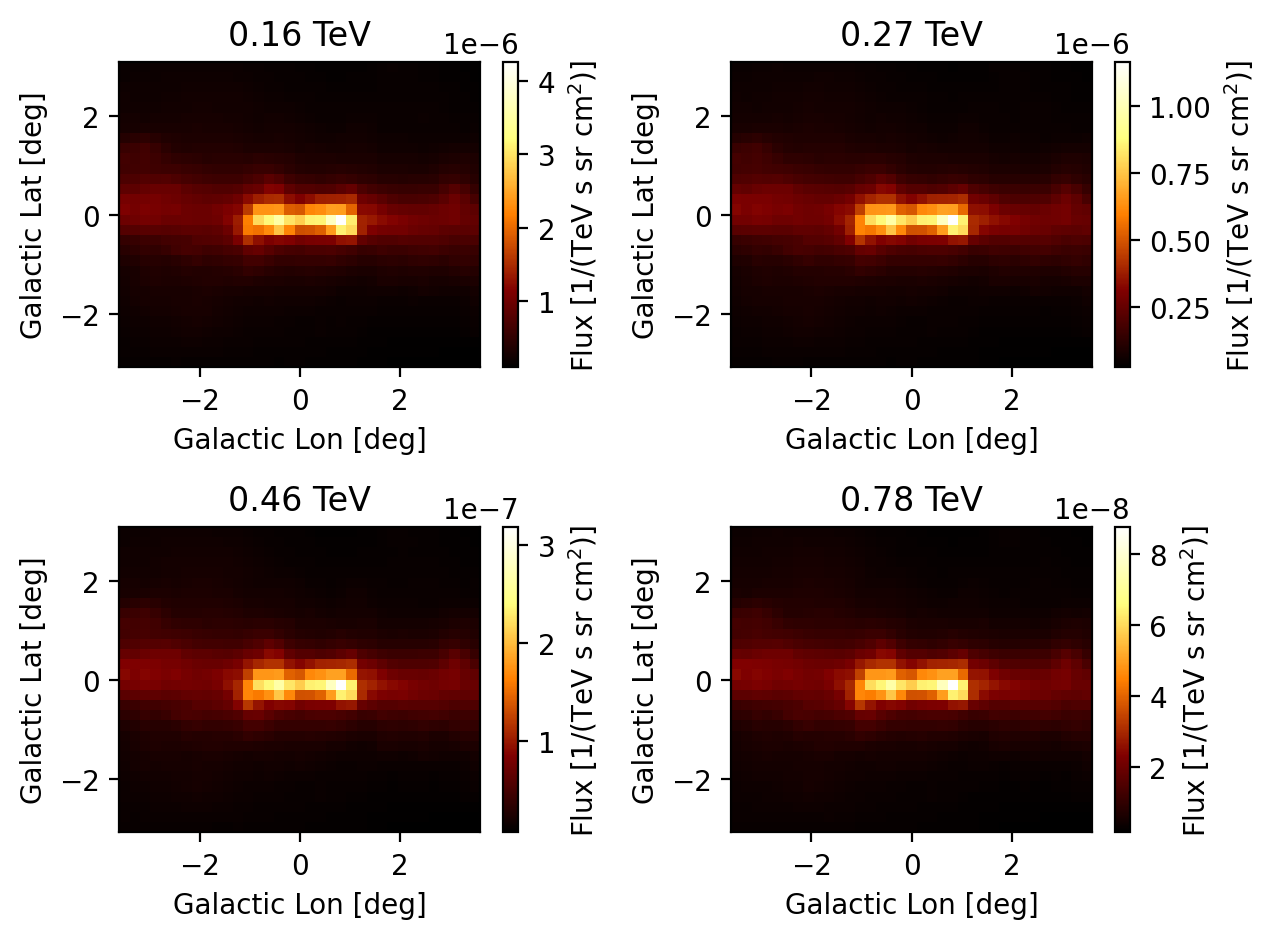

In [22]:

plt.figure(dpi=200)

counter=1
for idx in np.arange(0, log10eaxistrue.shape[0], int(log10eaxistrue.shape[0]/10)):
    plt.subplot(2,2,counter)
    plt.title(f'{round(10**log10eaxistrue[idx],2)} TeV')
    plt.pcolormesh(fermilonaxis, fermilataxis, fermievaluated[idx].T, cmap='afmhot')
    plt.colorbar(label=r'Flux [1/(TeV s sr cm$^2$)]')
    plt.xlabel('Galactic Lon [deg]')
    plt.ylabel('Galactic Lat [deg]')
    counter+=1
    if counter>4:
        break

plt.tight_layout()
plt.show()

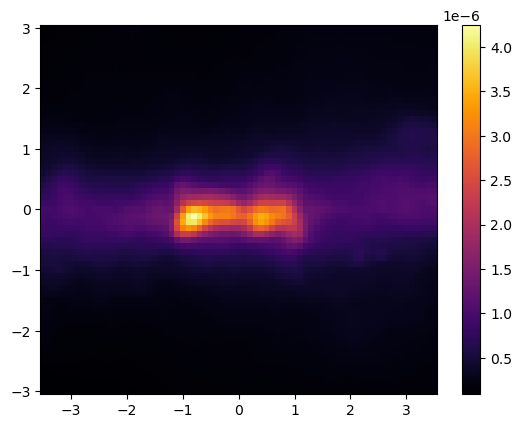

In [23]:
fermiunit = fermievaluated.unit
fermiunit

Unit("1 / (cm2 s sr TeV)")

In [24]:
fermienergyvals = energy_axis_true.center.value
fermienergyvals

array([ 0.15848932,  0.16218101,  0.16595869,  0.16982437,  0.17378008,
        0.17782794,  0.18197009,  0.18620871,  0.19054607,  0.19498446,
        0.19952623,  0.20417379,  0.20892961,  0.21379621,  0.21877616,
        0.22387211,  0.22908677,  0.23442288,  0.23988329,  0.24547089,
        0.25118864,  0.25703958,  0.2630268 ,  0.26915348,  0.27542287,
        0.28183829,  0.28840315,  0.29512092,  0.30199517,  0.30902954,
        0.31622777,  0.32359366,  0.33113112,  0.33884416,  0.34673685,
        0.35481339,  0.36307805,  0.37153523,  0.3801894 ,  0.38904514,
        0.39810717,  0.40738028,  0.41686938,  0.42657952,  0.43651583,
        0.44668359,  0.45708819,  0.46773514,  0.47863009,  0.48977882,
        0.50118723,  0.51286138,  0.52480746,  0.5370318 ,  0.54954087,
        0.56234133,  0.57543994,  0.58884366,  0.60255959,  0.616595  ,
        0.63095734,  0.64565423,  0.66069345,  0.67608298,  0.69183097,
        0.70794578,  0.72443596,  0.74131024,  0.75857758,  0.77

In [25]:
fermievaluated[0,0,0]

<Quantity 1.48894384e-07 1 / (cm2 s sr TeV)>

# Adding the two astrophysical components together

In [26]:
fermiplotmap = fermievaluated.value
combinedplotmap = fermifull #+ np.flip(fullhessdataset, axis=1)

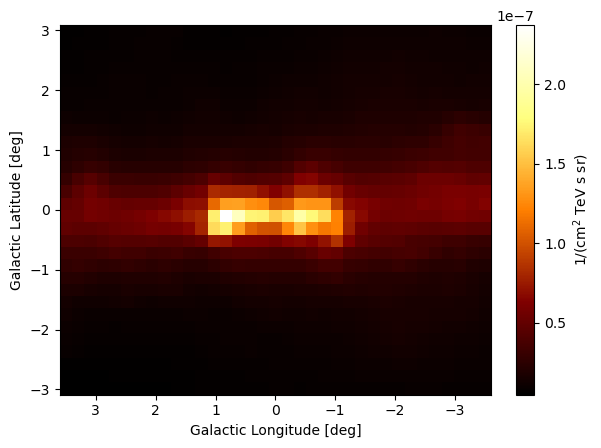

In [27]:


fig6, ax = plt.subplots(dpi=100)
plt.pcolormesh(fermilonaxis, fermilataxis, np.max(combinedplotmap,axis=0).T, cmap='afmhot')#, norm=LogNorm(vmin=1e-6, vmax=5e-5))
plt.xlabel("Galactic Longitude [deg]")
ax.invert_xaxis()

plt.ylabel("Galactic Latitude [deg]")
ax.set_aspect(1)
plt.colorbar(fraction=0.05, label=r"1/(cm$^2$ TeV s sr)")

plt.show()

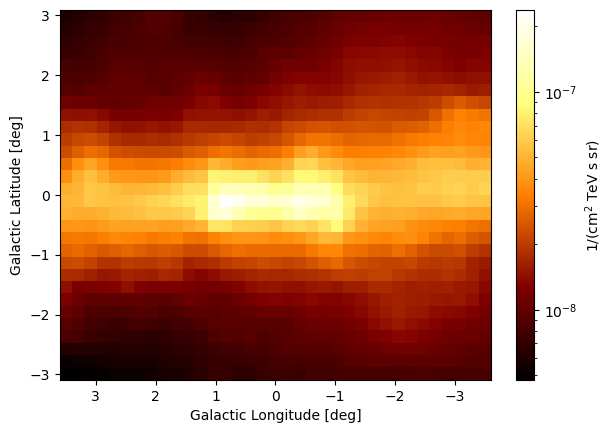

In [28]:
fig6, ax = plt.subplots(dpi=100)
plt.pcolormesh(fermilonaxis, fermilataxis, np.max(combinedplotmap,axis=0).T, cmap='afmhot', norm=LogNorm())#, vmax=1e-5)
plt.xlabel("Galactic Longitude [deg]")
ax.invert_xaxis()
plt.ylabel("Galactic Latitude [deg]")
ax.set_aspect(1)
plt.colorbar(fraction=0.05, label=r"1/(cm$^2$ TeV s sr)")

plt.show()

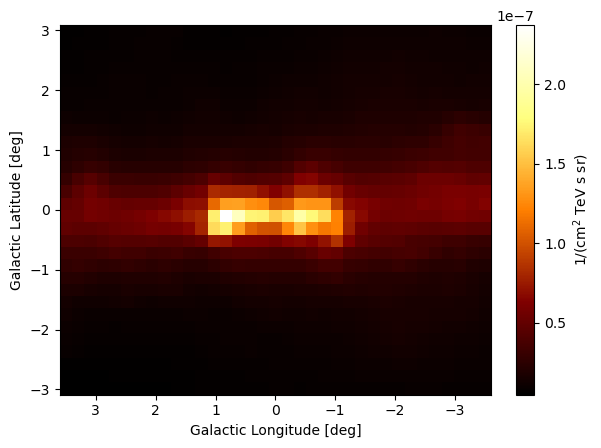

In [29]:
fig6, ax = plt.subplots(dpi=100)
plt.pcolormesh(fermilonaxis, fermilataxis, np.max(combinedplotmap,axis=0).T, cmap='afmhot')#, vmax=1e-5)
plt.xlabel("Galactic Longitude [deg]")
ax.invert_xaxis()
plt.ylabel("Galactic Latitude [deg]")
ax.set_aspect(1)
plt.colorbar(fraction=0.05, label=r"1/(cm$^2$ TeV s sr)")

plt.show()

In [30]:
combinedplotmap.shape

(231, 35, 30)

In [31]:
from utils3d import irfs

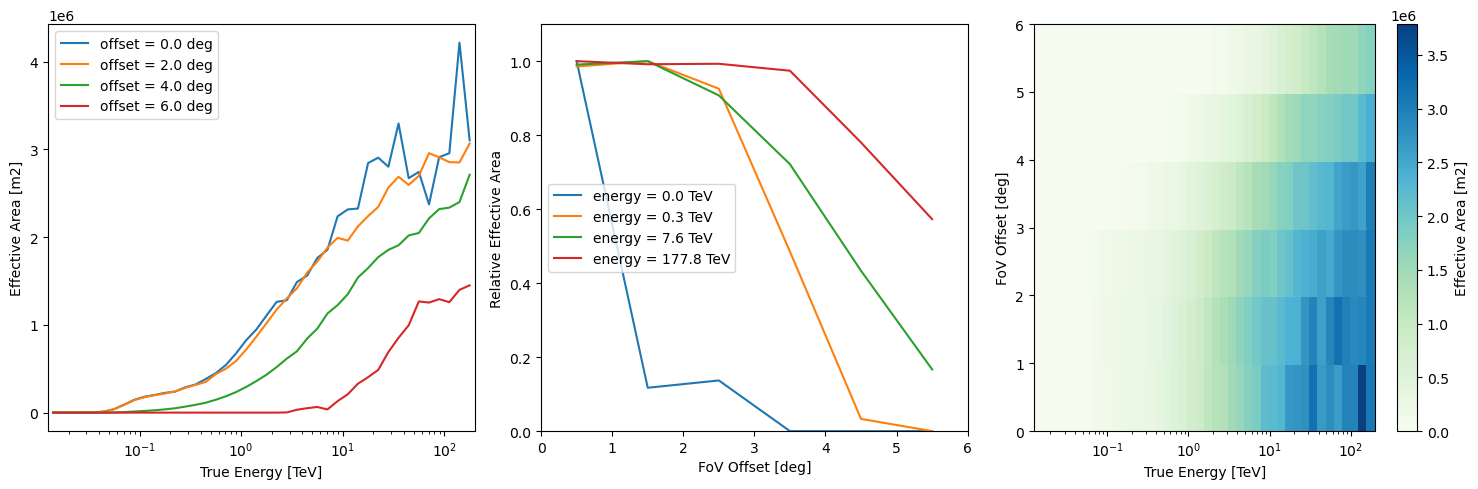

In [32]:
aeff = irfs['aeff']
aeff.peek()

In [33]:
aefffunc = lambda energy, offset: aeff.evaluate(energy_true = energy*u.TeV, offset=offset*u.deg).to(u.cm**2).value

In [34]:
aeff.evaluate(energy_true = 1*u.TeV, offset=0.5*u.deg)/1e5

<Quantity 7.35946814 m2>

In [35]:
aefffunc(1.0, 0.5)/1e9

7.359468135925809

In [36]:
lonmesh, energymesh, latmesh = np.meshgrid(longitudeaxistrue, 10**log10eaxistrue, latitudeaxistrue)
print(lonmesh.shape)

(231, 35, 30)


In [37]:
aefftable = aefffunc(energymesh, np.sqrt((lonmesh**2)+(latmesh**2)))

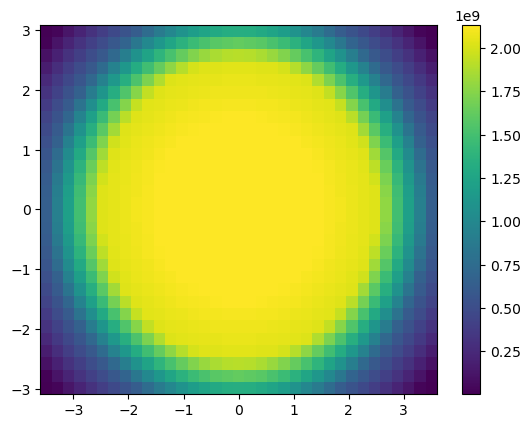

In [38]:
plt.pcolormesh(fermilonaxis, fermilataxis, aefftable[0,:,:].T)
plt.colorbar()
plt.show()

In [39]:
# aefftable[75,250,250]

In [40]:
# fermilataxis[250]

In [41]:
# aefffunc(fermienergyvals[75], np.sqrt(fermilonaxis[250]**2+fermilataxis[250]**2))

In [42]:
np.log(fermienergyvals[1:]-fermienergyvals[:-1])

array([-5.6016708 , -5.57864495, -5.5556191 , -5.53259325, -5.50956739,
       -5.48654154, -5.46351569, -5.44048984, -5.41746399, -5.39443814,
       -5.37141229, -5.34838644, -5.32536059, -5.30233474, -5.27930889,
       -5.25628303, -5.23325718, -5.21023133, -5.18720548, -5.16417963,
       -5.14115378, -5.11812793, -5.09510208, -5.07207623, -5.04905038,
       -5.02602453, -5.00299867, -4.97997282, -4.95694697, -4.93392112,
       -4.91089527, -4.88786942, -4.86484357, -4.84181772, -4.81879187,
       -4.79576602, -4.77274017, -4.74971431, -4.72668846, -4.70366261,
       -4.68063676, -4.65761091, -4.63458506, -4.61155921, -4.58853336,
       -4.56550751, -4.54248166, -4.5194558 , -4.49642995, -4.4734041 ,
       -4.45037825, -4.4273524 , -4.40432655, -4.3813007 , -4.35827485,
       -4.335249  , -4.31222315, -4.2891973 , -4.26617144, -4.24314559,
       -4.22011974, -4.19709389, -4.17406804, -4.15104219, -4.12801634,
       -4.10499049, -4.08196464, -4.05893879, -4.03591294, -4.01

# Adding the Aeff to the map

In [43]:
combinedplotmapwithaeff = combinedplotmap*aefftable
combinedplotmapwithaeff = combinedplotmapwithaeff
topbound=1e1000
combinedplotmapwithaeff[combinedplotmapwithaeff>topbound] = topbound
normalisation = np.sum(combinedplotmapwithaeff.T*10**log10eaxistrue*np.log(10)*(log10eaxistrue[1]-log10eaxistrue[0]))
# combinedplotmapwithaeff=combinedplotmapwithaeff/normalisation
# modtopbound = topbound/normalisation
spatialplotcombined = np.sum((combinedplotmapwithaeff.T*10**log10eaxistrue*np.log(10)*(log10eaxistrue[1]-log10eaxistrue[0])).T, axis=0)
spatialplotcombinedmaxvalue = np.max(spatialplotcombined)

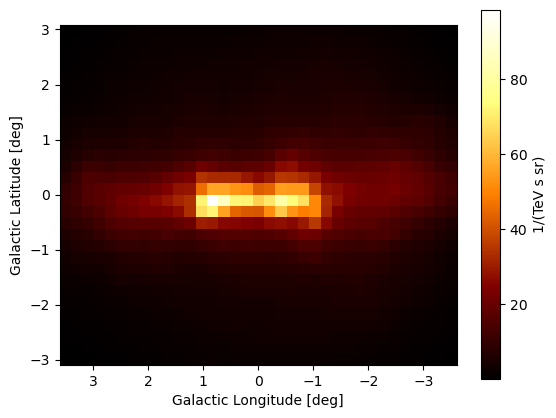

In [44]:
fig, ax = plt.subplots(1,1, dpi=100)
plt.pcolormesh(fermilonaxis, fermilataxis, spatialplotcombined.T, vmax=spatialplotcombinedmaxvalue, vmin=spatialplotcombinedmaxvalue/1e4, cmap='afmhot')
plt.xlabel("Galactic Longitude [deg]")
plt.ylabel("Galactic Latitude [deg]")
ax.invert_xaxis()
plt.colorbar(label = r"1/(TeV s sr)")
ax.set_aspect(1)

plt.show()

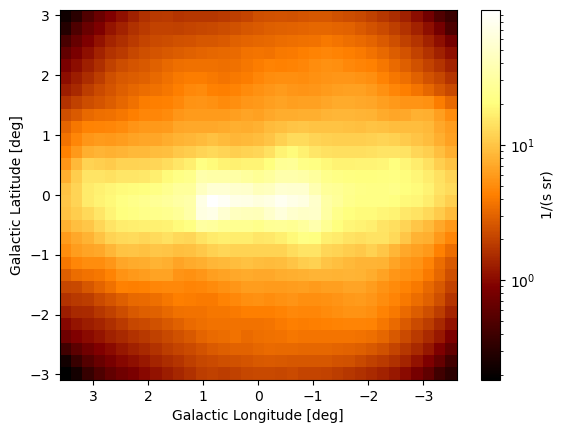

In [45]:
fig, ax = plt.subplots(1,1, dpi=100)
plt.pcolormesh(fermilonaxis, fermilataxis, spatialplotcombined.T, norm=LogNorm(), cmap='afmhot')
plt.xlabel("Galactic Longitude [deg]")
plt.ylabel("Galactic Latitude [deg]")
ax.invert_xaxis()
plt.colorbar(label = r"1/(s sr)")

plt.show()

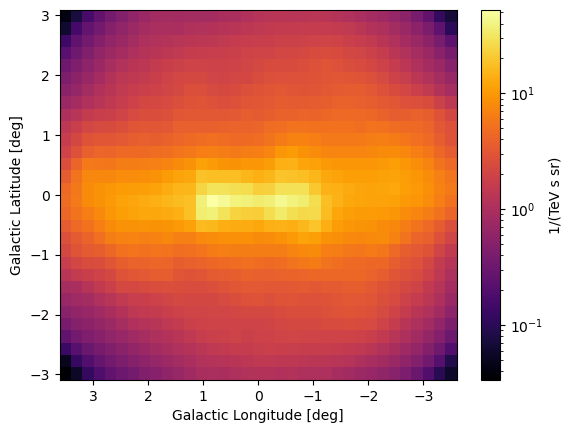

In [46]:
fig, ax = plt.subplots(1,1)
plt.pcolormesh(fermilonaxis, fermilataxis, np.mean(combinedplotmapwithaeff, axis=0).T, norm=LogNorm(), cmap='inferno')
plt.xlabel("Galactic Longitude [deg]")
plt.ylabel("Galactic Latitude [deg]")
ax.invert_xaxis()
plt.colorbar(label = r"1/(TeV s sr)")
plt.show()

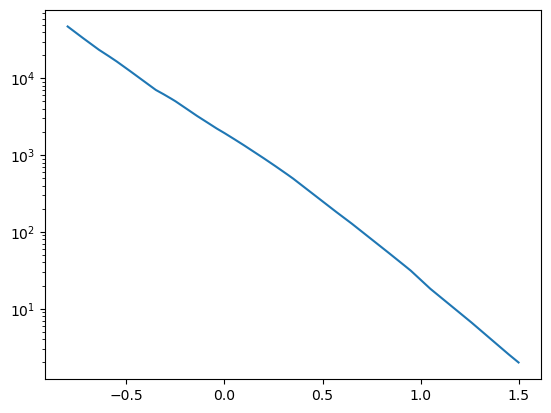

In [47]:
fig, ax = plt.subplots(1,1)
plt.plot(log10eaxistrue, np.sum(combinedplotmapwithaeff, axis=(1,2)))
plt.yscale('log')
plt.show()

In [48]:
np.min(combinedplotmapwithaeff)

0.00021894618728461666

In [49]:
np.save("unnormalised_astrophysicalbackground.npy", combinedplotmapwithaeff)

In [50]:
simps(y=simps(y=simps(y=combinedplotmapwithaeff, x=10**log10eaxistrue, axis=0), x = longitudeaxistrue, axis=0), x=latitudeaxistrue)/1.08e8

3.6540667283369847e-06

In [51]:
fermilataxis

array([-2.98529412, -2.77941176, -2.57352941, -2.36764706, -2.16176471,
       -1.95588235, -1.75      , -1.54411765, -1.33823529, -1.13235294,
       -0.92647059, -0.72058824, -0.51470588, -0.30882353, -0.10294118,
        0.10294118,  0.30882353,  0.51470588,  0.72058824,  0.92647059,
        1.13235294,  1.33823529,  1.54411765,  1.75      ,  1.95588235,
        2.16176471,  2.36764706,  2.57352941,  2.77941176,  2.98529412])

In [52]:
longitudeaxistrue.shape

(35,)

In [53]:
combinedplotmapwithaeff.shape

(231, 35, 30)

In [54]:
simps(y=simps(y=simps(y=combinedplotmapwithaeff, x=10**log10eaxistrue,axis=0), x=longitudeaxistrue, axis=0), x=latitudeaxistrue)*60*60*525/1e8

7.458681005881454

In [55]:
import pandas as pd
data = pd.read_csv("CR_BKG.csv")
data = np.asarray(data)

In [56]:

bkginterp = interpolate.interp1d(x = data[:,0],y = 1.1*data[:,1], bounds_error=False, fill_value="extrapolate", kind='linear')

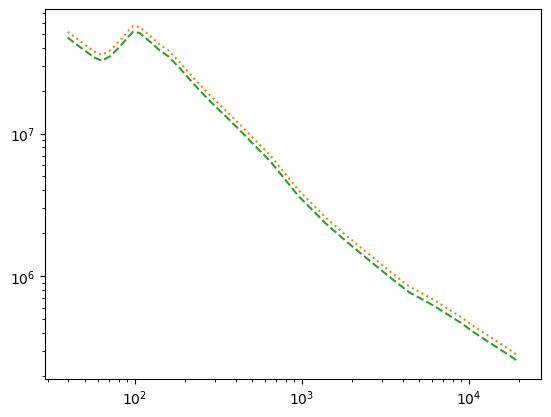

In [57]:
plt.figure()
plt.plot(data[:,0],data[:,1], c='tab:green', ls='--')
plt.plot(data[:,0],bkginterp(data[:,0]), c='tab:orange', ls=':')
plt.loglog()
plt.show()

In [58]:
bkginterp(30),

(array(60993495.83836544),)

In [59]:
gev_energy_range = np.logspace(np.log10(30), np.log10(100000), 55)
gev_energy_range
bkginterpdata = bkginterp(gev_energy_range)

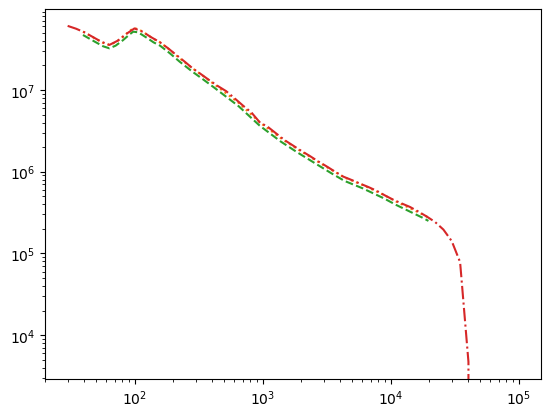

In [60]:
plt.figure()
plt.plot(data[:,0],data[:,1], c='tab:green', ls='--')
plt.plot(data[:,0],bkginterp(data[:,0]), c='tab:orange', ls=':')
plt.plot(gev_energy_range,bkginterpdata, c='tab:red', ls='-.')

plt.loglog()
plt.show()

In [61]:


simps(y=bkginterpdata/gev_energy_range, x=gev_energy_range)/1.08e8

1.0173884220265068

In [62]:
bkginterpdata

array([ 6.09934958e+07,  5.63517756e+07,  5.09576948e+07,  4.46893057e+07,
        3.91491379e+07,  3.56564129e+07,  4.01757839e+07,  4.84631756e+07,
        5.67573635e+07,  5.15634163e+07,  4.42965576e+07,  3.87569973e+07,
        3.26015451e+07,  2.69185285e+07,  2.23233877e+07,  1.83094402e+07,
        1.55500163e+07,  1.31224099e+07,  1.11697573e+07,  9.66317862e+06,
        7.91240369e+06,  6.44517823e+06,  5.32475156e+06,  4.03076768e+06,
        3.51969278e+06,  2.92577948e+06,  2.42878144e+06,  2.08894208e+06,
        1.79544278e+06,  1.55864975e+06,  1.34032184e+06,  1.16480728e+06,
        1.00557188e+06,  8.71887027e+05,  7.92842231e+05,  7.16423674e+05,
        6.50520859e+05,  5.84960383e+05,  5.12804143e+05,  4.53680818e+05,
        4.09070066e+05,  3.70390784e+05,  3.25442109e+05,  2.82937970e+05,
        2.42646528e+05,  1.95824382e+05,  1.41412994e+05,  7.81822489e+04,
        4.70264674e+03, -8.06870147e+04, -1.79917196e+05, -2.95231261e+05,
       -4.29236192e+05, -

In [63]:

from gammapy.astro.darkmatter import (
    profiles,
    JFactory
)

profile = profiles.EinastoProfile()

# Adopt standard values used in HESS
profiles.DMProfile.DISTANCE_GC = 8.5 * u.kpc
profiles.DMProfile.LOCAL_DENSITY = 0.39 * u.Unit("GeV / cm3")

profile.scale_to_local_density()

position = SkyCoord(0.0, 0.0, frame="galactic", unit="deg")
geom = WcsGeom.create(skydir=position, 
                      binsz=longitudeaxistrue[1]-longitudeaxistrue[0],
                      width=(longitudeaxistrue[-1]-longitudeaxistrue[0]+longitudeaxistrue[1]-longitudeaxistrue[0], latitudeaxistrue[-1]-latitudeaxistrue[0]+longitudeaxistrue[1]-longitudeaxistrue[0]),
                      frame="galactic")

In [64]:
jfactory = JFactory(
    geom=geom, profile=profile, distance=profiles.DMProfile.DISTANCE_GC
)
jfact = jfactory.compute_differential_jfactor()

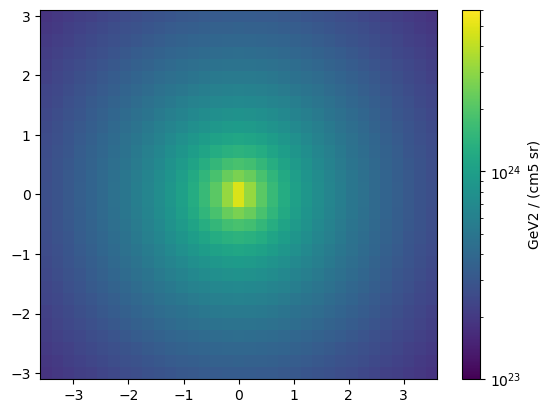

In [65]:
plt.figure()
plt.pcolormesh(longitudeaxistrue, latitudeaxistrue, jfact, norm=LogNorm(vmin=1e23, vmax=6e24))
plt.colorbar(label=jfact.unit)
plt.show()

In [66]:
jfact.value

array([[1.84534719e+23, 1.93437257e+23, 2.02740852e+23, ...,
        2.02740852e+23, 1.93437257e+23, 1.84534719e+23],
       [1.92023532e+23, 2.01794382e+23, 2.12071189e+23, ...,
        2.12071189e+23, 2.01794382e+23, 1.92023532e+23],
       [1.99624562e+23, 2.10330368e+23, 2.21666635e+23, ...,
        2.21666635e+23, 2.10330368e+23, 1.99624562e+23],
       ...,
       [1.99624562e+23, 2.10330368e+23, 2.21666635e+23, ...,
        2.21666635e+23, 2.10330368e+23, 1.99624562e+23],
       [1.92023532e+23, 2.01794382e+23, 2.12071189e+23, ...,
        2.12071189e+23, 2.01794382e+23, 1.92023532e+23],
       [1.84534719e+23, 1.93437257e+23, 2.02740852e+23, ...,
        2.02740852e+23, 1.93437257e+23, 1.84534719e+23]])

In [67]:
from utils3d import bkgdist

lonmeshtrue, log10emeshtrue, latmeshtrue = np.meshgrid(longitudeaxistrue, log10eaxistrue, latitudeaxistrue)

logbkgpriorvalues = np.squeeze(np.logaddexp(bkgdist(log10emeshtrue, lonmeshtrue,latmeshtrue),np.log(combinedplotmapwithaeff)))
logbkgpriorvalues.shape

(231, 35, 30)

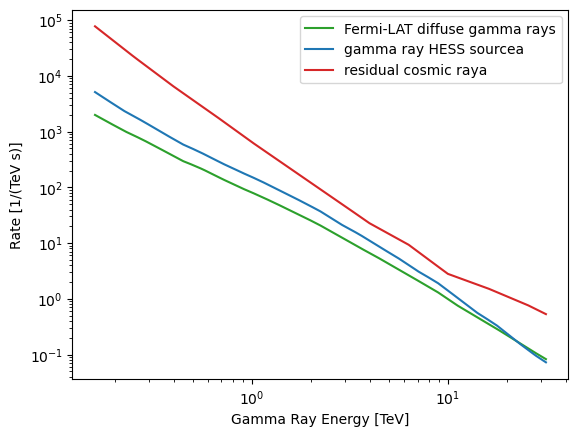

In [77]:
plt.figure()
# plt.plot(log10eaxistrue, np.mean(logbkgpriorvalues, axis=(1,2)), c='tab:blue')
plt.plot(10**log10eaxistrue, simps(y=simps(y=fermifull*aefftable, x=longitudeaxistrue, axis=1), 
                                   x=latitudeaxistrue, axis=1), 
         c="tab:green", label='Fermi-LAT diffuse gamma rays')
plt.plot(10**log10eaxistrue, simps(y=simps(y=np.flip(fullhessdataset, axis=1)*aefftable, x=longitudeaxistrue, axis=1), 
                                   x=latitudeaxistrue, axis=1), 
         c="tab:blue", label='gamma ray HESS sourcea')
plt.plot(10**log10eaxistrue, simps(y=simps(y=np.exp(bkgdist(log10emeshtrue, lonmeshtrue,latmeshtrue)), 
                                                    x=longitudeaxistrue, axis=1), x=latitudeaxistrue, axis=1), 
                                   c="tab:red", label='residual cosmic raya')


plt.loglog()
plt.xlabel(r"Gamma Ray Energy [TeV]")
plt.ylabel(r"Rate [1/(TeV s)]")
plt.legend()
plt.savefig('Figures/integrated_bkg_spectra.pdf')
plt.show()

In [69]:
from utils3d import bkgfull

In [70]:
bkgfull.evaluate(energy=10**0*u.TeV, fov_lon=1.0*u.deg, fov_lat=1.0*u.deg).to(1/(u.TeV*u.s*u.sr))

<Quantity 116.55200141 1 / (s sr TeV)>